<a href="https://colab.research.google.com/github/NeoMorpheus99/AI-ML/blob/main/mode/YOLO_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [55]:
!nvidia-smi

Thu Aug 22 19:20:06 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   46C    P8              11W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [56]:
!pip install ultralytics

In [57]:
import os

In [60]:
HOME = "/content/drive/MyDrive/YOLOv9"

In [61]:
print(HOME)

/content/drive/MyDrive/YOLOv9


In [62]:
%cd {HOME}

/content/drive/MyDrive/YOLOv9


In [63]:
!git clone https://github.com/WongKinYiu/yolov9.git

Cloning into 'yolov9'...
remote: Enumerating objects: 781, done.
remote: Counting objects: 100% (407/407), done.
remote: Compressing objects: 100% (168/168), done.
remote: Total 781 (delta 280), reused 276 (delta 227), pack-reused 374 (from 1)
Receiving objects: 100% (781/781), 3.30 MiB | 6.44 MiB/s, done.
Resolving deltas: 100% (325/325), done.


In [64]:
%cd yolov9

/content/drive/MyDrive/YOLOv9/yolov9


In [65]:
!pip install -r requirements.txt

In [66]:
!pip install -q roboflow

In [67]:
from IPython.display import Image, clear_output

In [68]:
!mkdir -p {HOME}/weights

In [69]:
!wget -P {HOME}/weights -q https://github.com/WongKinYiu/yolov9/releases/download/v0.1/yolov9-c.pt
!wget -P {HOME}/weights -q https://github.com/WongKinYiu/yolov9/releases/download/v0.1/yolov9-e.pt
!wget -P {HOME}/weights -q https://github.com/WongKinYiu/yolov9/releases/download/v0.1/gelan-c.pt
!wget -P {HOME}/weights -q https://github.com/WongKinYiu/yolov9/releases/download/v0.1/gelan-e.pt

In [70]:
!ls -la {home}/weights

total 402426
-rw------- 1 root root  51508261 Feb 18  2024 gelan-c.pt
-rw------- 1 root root 117203713 Feb 18  2024 gelan-e.pt
-rw------- 1 root root 103153312 Feb 18  2024 yolov9-c.pt
-rw------- 1 root root 140217688 Feb 18  2024 yolov9-e.pt


In [71]:
!mkdir -p {HOME}/data

In [72]:
!wget -P {HOME}/data -q https://media.roboflow.com/notebooks/examples/dog.jpeg

In [73]:
SOURCE_IMAGE_PATH = f"{HOME}/dog.jpeg"

In [74]:
!python detect.py --weights {HOME}/weights/gelan-c.pt --conf 0.1 --source {HOME}/data/dog.jpeg --device 0

detect: weights=['/content/drive/MyDrive/YOLOv9/weights/gelan-c.pt'], source=/content/drive/MyDrive/YOLOv9/data/dog.jpeg, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.1, iou_thres=0.45, max_det=1000, device=0, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLO 🚀 v0.1-104-g5b1ea9a Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 387 layers, 25288768 parameters, 0 gradients, 102.1 GFLOPs
image 1/1 /content/drive/MyDrive/YOLOv9/data/dog.jpeg: 640x384 1 person, 1 car, 1 dog, 1 handbag, 145.1ms
Speed: 0.5ms pre-process, 145.1ms inference, 698.3ms NMS per image at shape (1, 3, 640, 640)
Results saved to runs/detect/exp


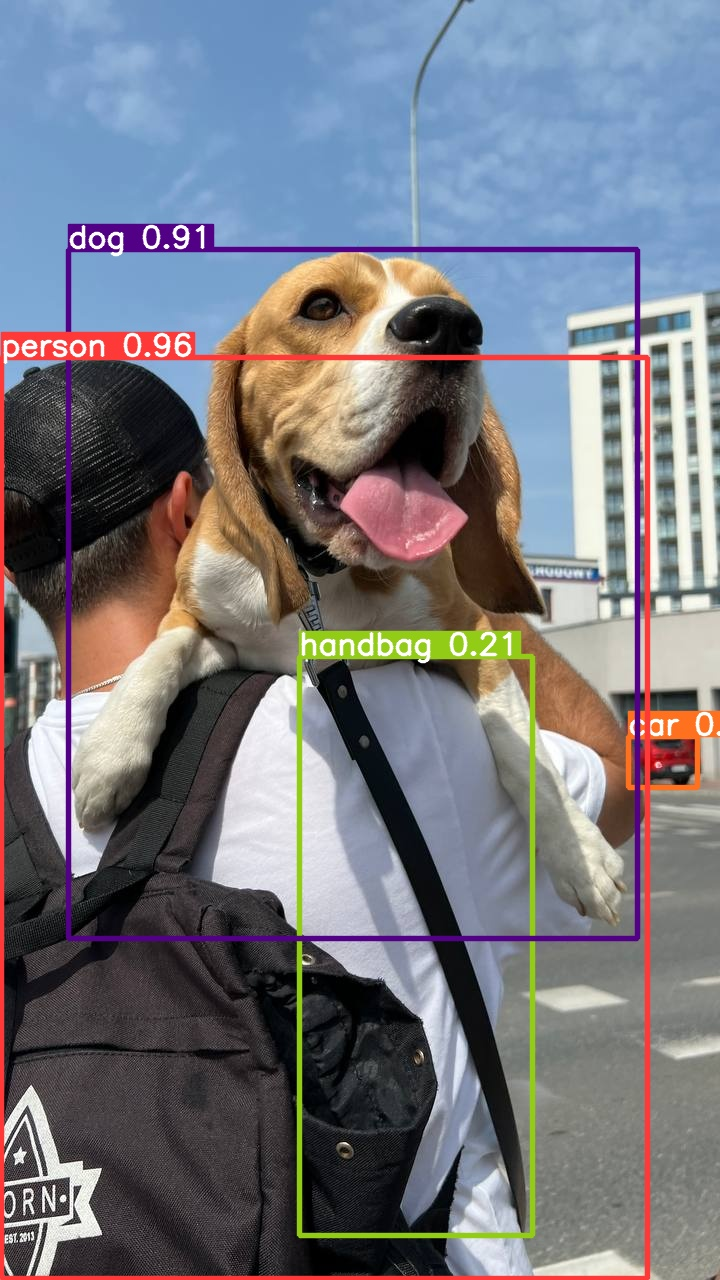

In [75]:
Image(filename=f"{HOME}/yolov9/runs/detect/exp/dog.jpeg", width=600)

In [76]:
!python detect.py --weights {HOME}/weights/yolov9-e.pt --conf 0.1 --source {HOME}/data/dog.jpeg --device 0

detect: weights=['/content/drive/MyDrive/YOLOv9/weights/yolov9-e.pt'], source=/content/drive/MyDrive/YOLOv9/data/dog.jpeg, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.1, iou_thres=0.45, max_det=1000, device=0, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLO 🚀 v0.1-104-g5b1ea9a Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 839 layers, 68669632 parameters, 0 gradients, 241.4 GFLOPs
Traceback (most recent call last):
  File "/content/drive/MyDrive/YOLOv9/yolov9/detect.py", line 231, in <module>
    main(opt)
  File "/content/drive/MyDrive/YOLOv9/yolov9/detect.py", line 226, in main
    run(**vars(opt))
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/_contextlib.py", li

In [77]:
Image(filename=f"{HOME}/yolov9/runs/detect/exp2/dog.jpeg", width=600)

FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/YOLOv9/yolov9/runs/detect/exp2/dog.jpeg'

In [83]:
%cd {HOME}/yolov9


from roboflow import Roboflow
rf = Roboflow(api_key="Owb7wL0INQDuAuAz9gth")
project = rf.workspace("nicolai-hoirup-nielsen").project("cup-detection-v2")
dataset = project.version(3).download("yolov9")



/content/drive/MyDrive/YOLOv9/yolov9
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Cup-Detection-v2-3 in yolov9:: 100%|██████████| 730/730 [00:05<00:00, 137.24it/s]


In [84]:
%cd {HOME}/yolov9

!python train.py \
--batch 8 --epochs 10 --img 640 --device 0 --min-items 0 --close-mosaic 15 \
--data {dataset.location}/data.yaml \
--weights {HOME}/weights/gelan-c.pt \
--cfg models/detect/gelan-c.yaml \
--hyp hyp.scratch-high.yaml

/content/drive/MyDrive/YOLOv9/yolov9
2024-08-22 19:30:32.471213: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-08-22 19:30:32.491020: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-08-22 19:30:32.497114: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-08-22 19:30:32.511465: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-08-

In [85]:
!ls {HOME}/yolov9/runs/train/exp/

events.out.tfevents.1724354688.4b85906d15a7.8778.0  hyp.yaml  opt.yaml	weights


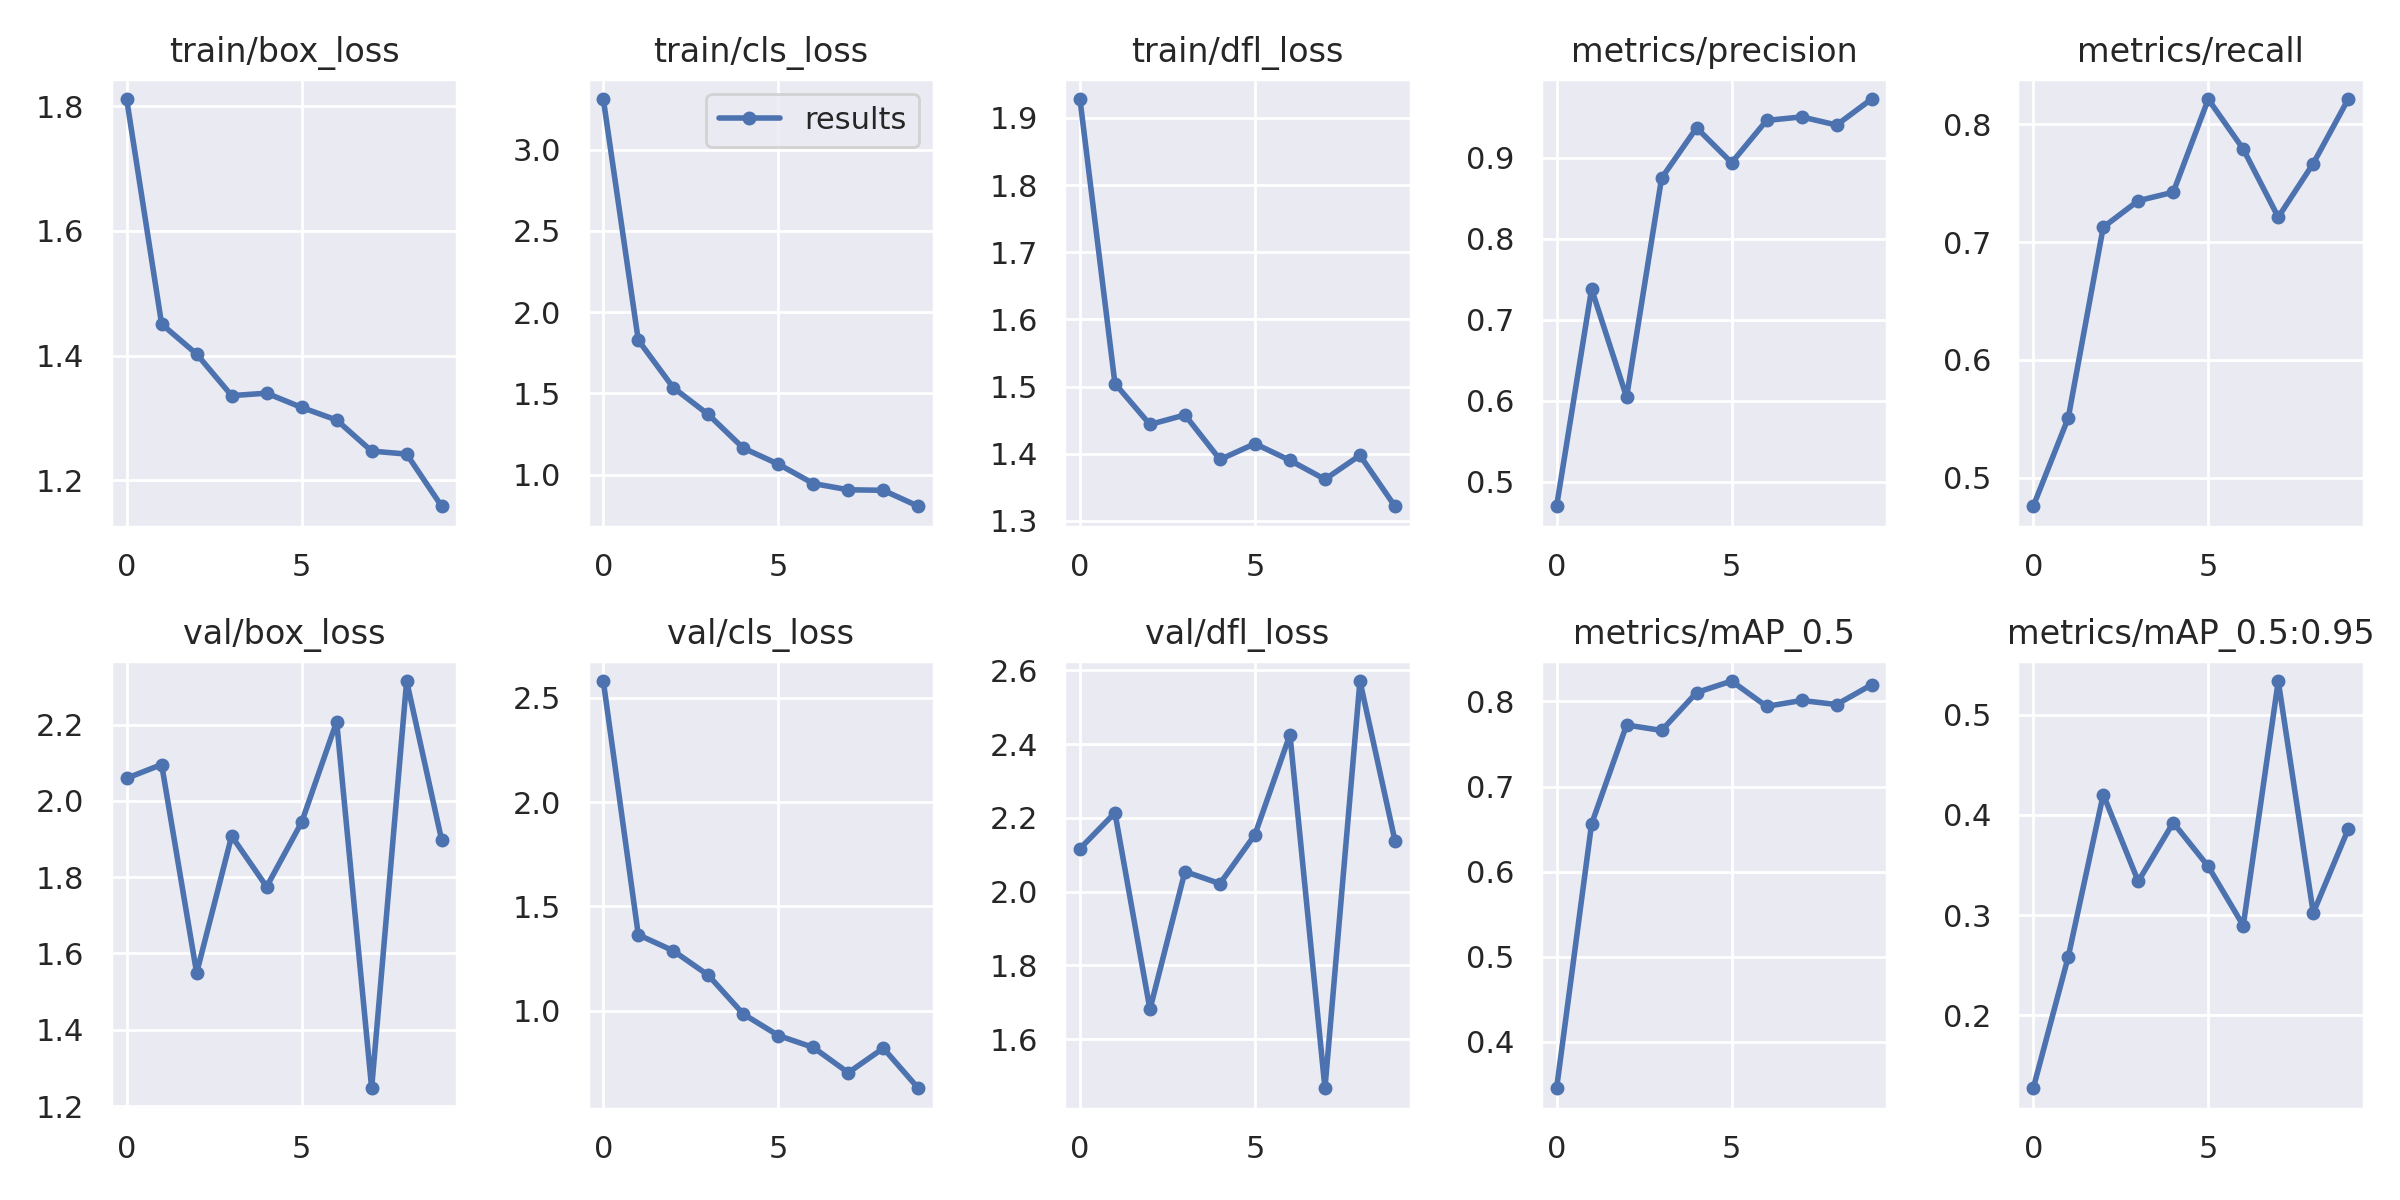

In [86]:
Image(filename=f"{HOME}/yolov9/runs/train/exp3/results.png", width=1000)

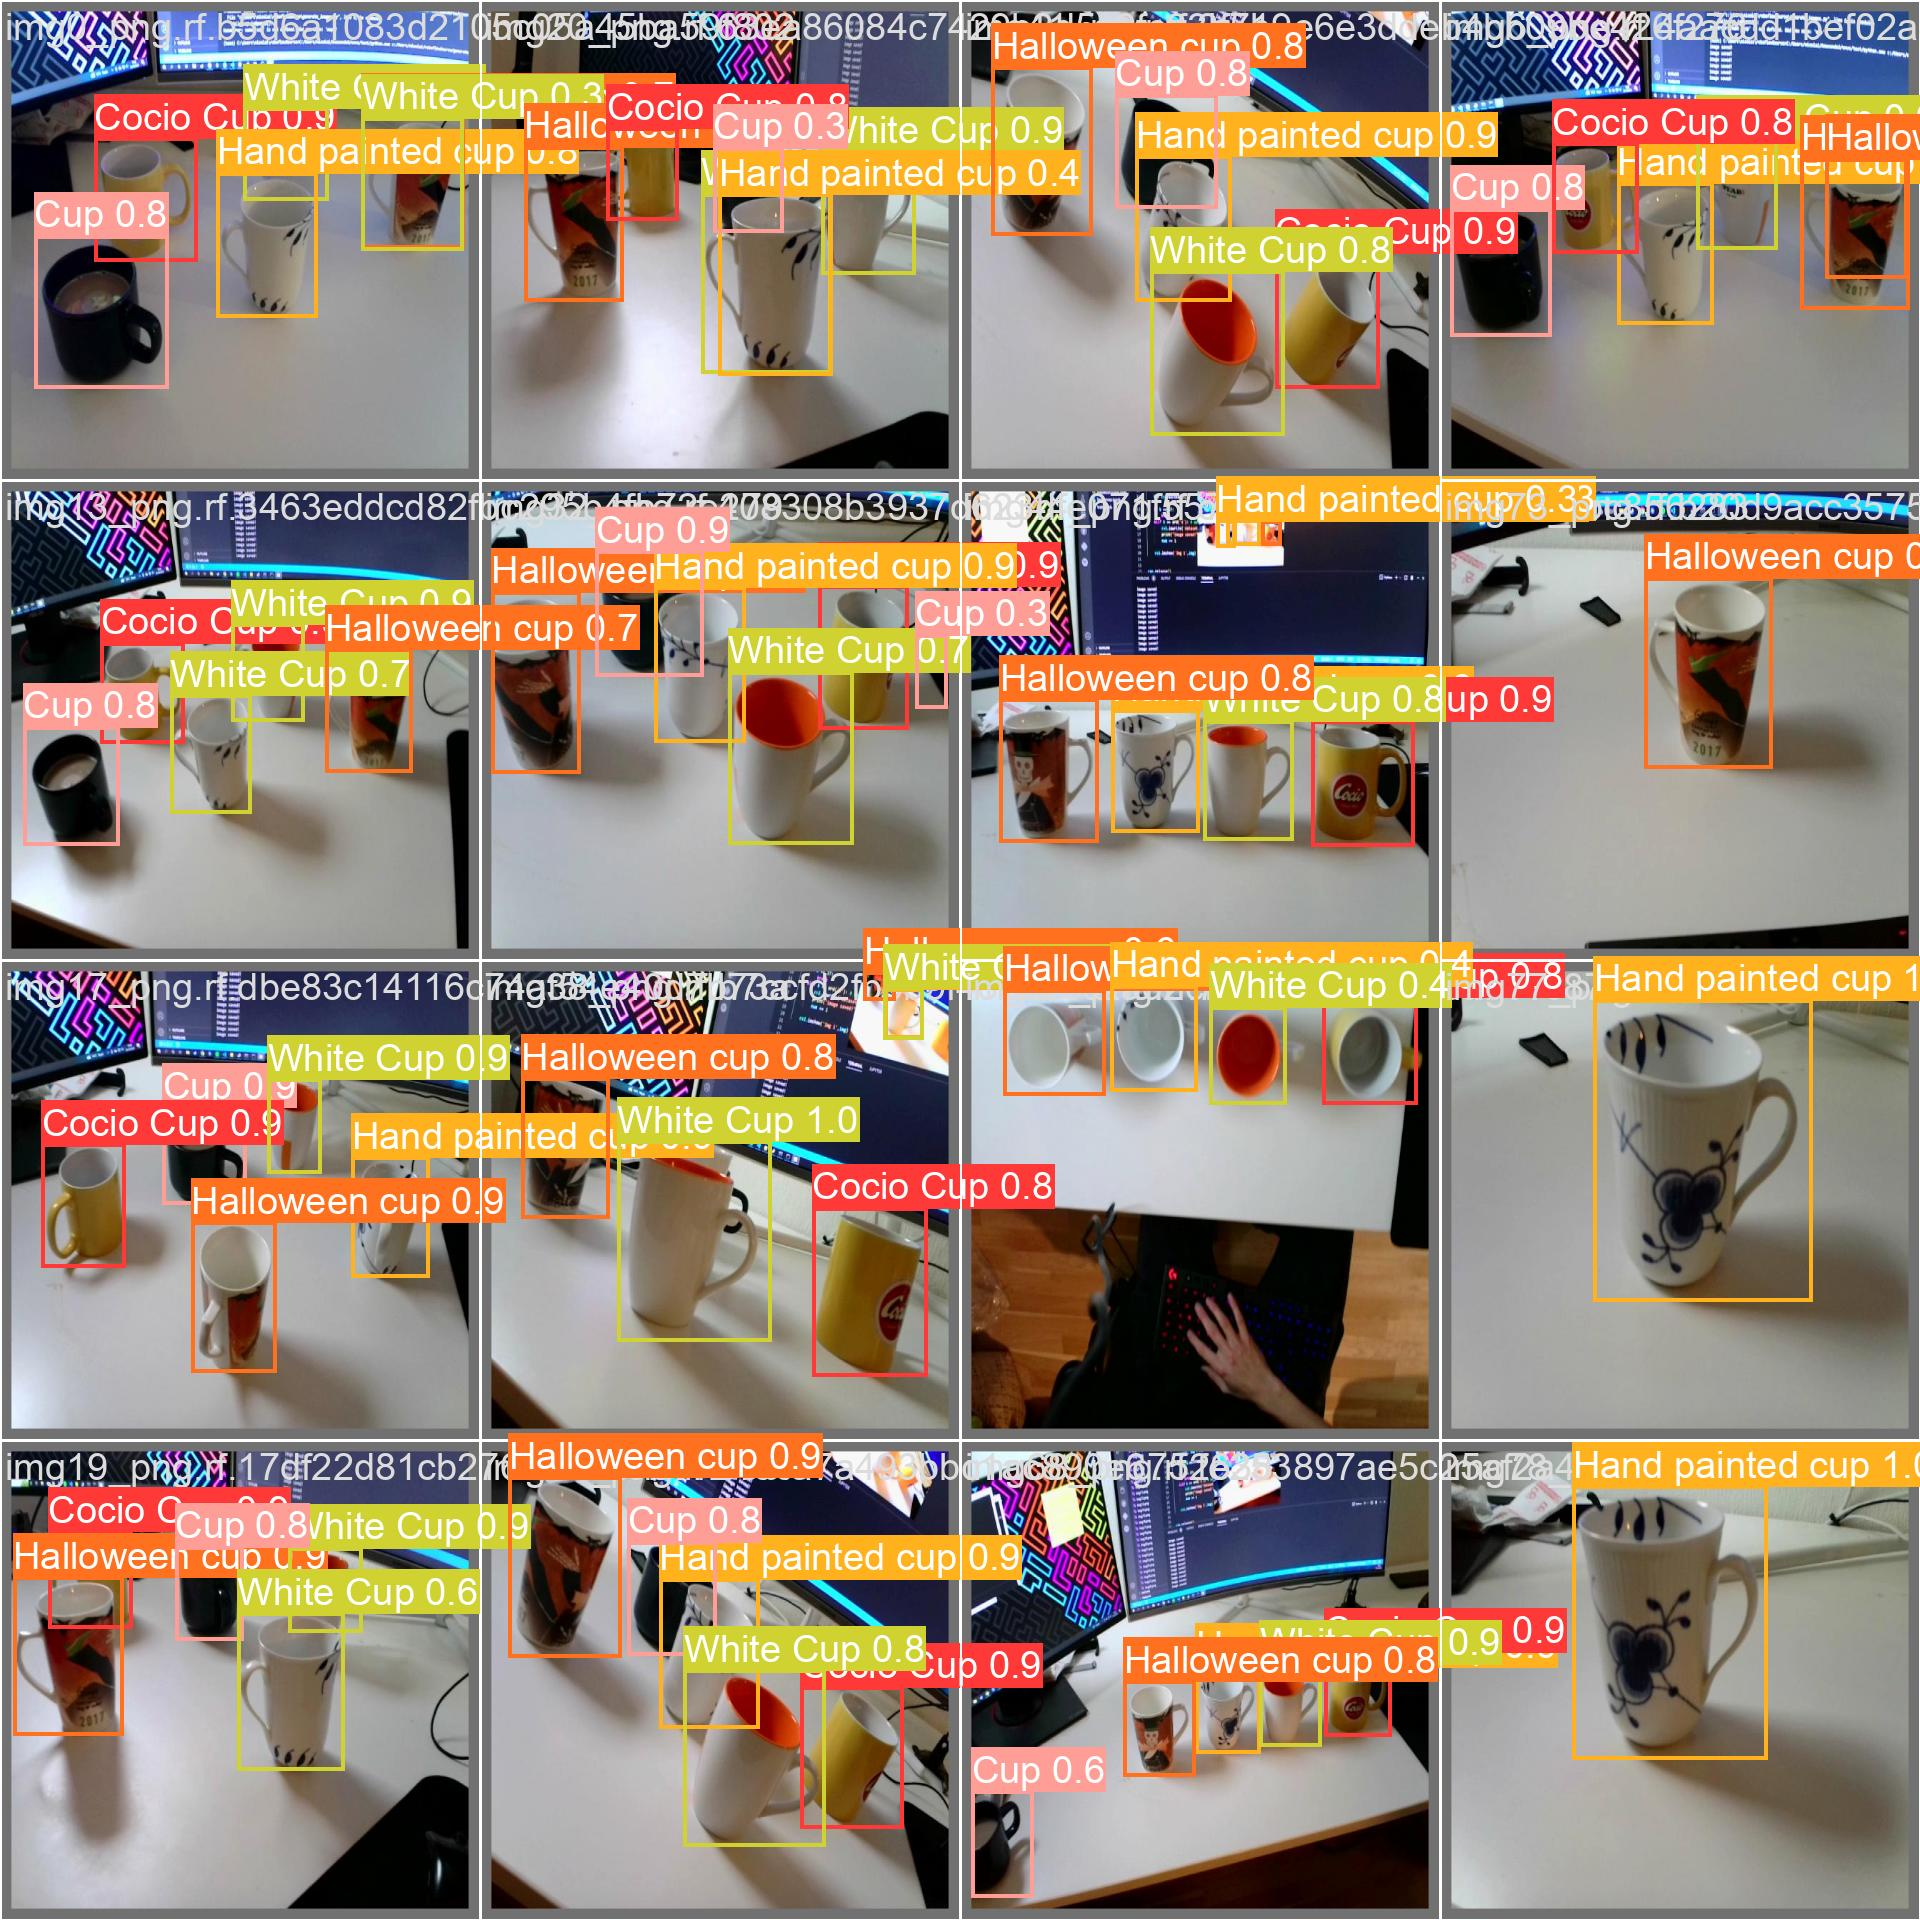

In [87]:
Image(filename=f"{HOME}/yolov9/runs/train/exp3/val_batch0_pred.jpg", width=1000)

In [88]:
%cd {HOME}/yolov9

!python val.py \
--img 640 --batch 8 --conf 0.001 --iou 0.7 --device 0 \
--data {dataset.location}/data.yaml \
--weights {HOME}/yolov9/runs/train/exp3/weights/best.pt

/content/drive/MyDrive/YOLOv9/yolov9
val: data=/content/drive/MyDrive/YOLOv9/yolov9/Cup-Detection-v2-3/data.yaml, weights=['/content/drive/MyDrive/YOLOv9/yolov9/runs/train/exp3/weights/best.pt'], batch_size=8, imgsz=640, conf_thres=0.001, iou_thres=0.7, max_det=300, task=val, device=0, workers=8, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=runs/val, name=exp, exist_ok=False, half=False, dnn=False, min_items=0
YOLO 🚀 v0.1-104-g5b1ea9a Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
gelan-c summary: 387 layers, 25231714 parameters, 0 gradients, 101.8 GFLOPs
val: Scanning /content/drive/MyDrive/YOLOv9/yolov9/Cup-Detection-v2-3/valid/labels.cache... 19 images, 0 backgrounds, 0 corrupt: 100% 19/19 [00:00<?, ?it/s]
                 Class     Images  Instances          P          R      mAP50   mAP50-95: 100% 3/3 [00:02<00:00,  1.02it/s]
                   all         19         71

In [89]:
!python detect.py \
--img 640 --conf 0.1 --device 0 \
--weights {HOME}/yolov9/runs/train/exp3/weights/best.pt \
--source {dataset.location}/valid/images

detect: weights=['/content/drive/MyDrive/YOLOv9/yolov9/runs/train/exp3/weights/best.pt'], source=/content/drive/MyDrive/YOLOv9/yolov9/Cup-Detection-v2-3/valid/images, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.1, iou_thres=0.45, max_det=1000, device=0, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLO 🚀 v0.1-104-g5b1ea9a Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
gelan-c summary: 387 layers, 25231714 parameters, 0 gradients, 101.8 GFLOPs
image 1/19 /content/drive/MyDrive/YOLOv9/yolov9/Cup-Detection-v2-3/valid/images/img0_png.rf.b5d6a1083d2105c05a45ba59f8022d20.jpg: 640x640 1 Cocio Cup, 1 Cup, 1 Halloween cup, 1 Hand painted cup, 2 White Cups, 50.4ms
image 2/19 /content/drive/MyDrive/YOLOv9/

In [91]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'{HOME}/yolov9/runs/detect/exp/*.jpg')[:3]:
      display(Image(filename=image_path, width=600))
      print("\n")